## Question D
Build a multi-layer perceptron network.  The input is the 784-dimensional vector, 28x28=784.  Use two hidden layers of 256 and 256 neurons each.  The output layer is 10.  The activations functions are all linear.

### Question D.1
[5] Build the model, and tune the learning rate to make sure that the training converges.  Using the same cross-validation as in (B).

In [38]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [42]:
tf.reset_default_graph()

numPixels = 784
firstLayerOutput = 256
secondLayerOutput = 256
numClassifications = 10

# Initial input
x = tf.placeholder(tf.float32, [None, numPixels])
# Reference
ref = tf.placeholder(tf.float32, [None, numClassifications])

logits1 = tf.layers.dense(inputs=x, units=firstLayerOutput, activation=None, name="L1")
logits2 = tf.layers.dense(inputs=logits1, units=secondLayerOutput, activation=None, name="L2")
logits3 = tf.layers.dense(inputs=logits2, units=numClassifications, activation=None, name="L3")

# Calculate the cross entropy, doing the softmax function internally
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits3, labels=ref)

# Take the average of the cross entropy values
cost = tf.reduce_mean(cross_entropy)

# (N). Take the highest percentile value in the prediction as the answer
prediction = tf.argmax(tf.nn.softmax(logits3), axis=1)

labels = []
for label in mnist.test.labels:
    labels.append(np.argmax(label))
labels = np.array(labels)

rate = 0.01
epochs = 100
iterationsPerEpoch = 10

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
s = tf.Session()
s.run(tf.global_variables_initializer())

errList = []
validationErrList = []
epochList = []

count = 0
for _ in range(epochs):
    inputData, correctAns = mnist.train.next_batch(100)
    validationInput, validationCorrect = mnist.train.next_batch(100)
    for _ in range(iterationsPerEpoch):
        # Do the training
        err, _ = s.run((cost, optimizer), feed_dict={x: inputData, ref: correctAns})

        # Do the validation
        validationErr = s.run((cost), feed_dict={x: validationInput, ref: validationCorrect})
        validationErrList.append(validationErr)
                
        errList.append(err)
        epochList.append(count)
        count += 1

print("DONE")

DONE


### Question D.2
[5] Plot the training error over the epochs.

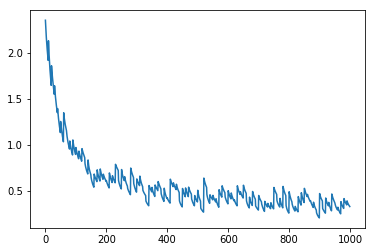

In [43]:
plt.plot(epochList, errList);
plt.show()

### Question D.3
[5] Plot the cross-validation error over the epochs. Is there overfitting?  Explain.

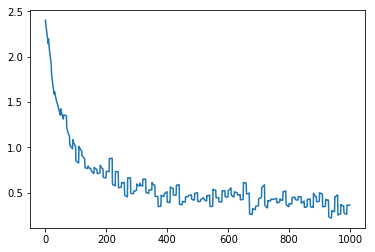

In [44]:
plt.plot(epochList, validationErrList);
plt.show()

It is hard to tell if overfitting is occuring since the the training data changes every 10 cycles of training thus you will not see a very obvious cross validation error. It can be seen that the cross validation error is decreasing faster than B.3 and stagnates around 0.4~. However it can be shown in the above graph that the cross validation error goes up and down and would likely increase with more and more training iterations.

### Question D.4
[5] Report the test error, and compare with (B.4).  Comment on your observation.

In [47]:
# Check the test error
predic = s.run((prediction), feed_dict={x: mnist.test.images})
answers = np.equal(labels, predic)
corrGuesses = np.sum(answers)
testErr = corrGuesses / len(answers)   
print("The test error for the final iteration of the training is: " + str((1 - testErr) * 100) + " percent.")

The test error for the final iteration of the training is: 10.28 percent.


The test error has decreased by a small amount from 15% error to around 10% error.